*Library*

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Live selling is becoming increasingly popular in Asian countries. Small vendors can now reach a wider audience
and connect with many customers.
We try to discover different categories of customers using clustering techniques. To this end, we shall use the
following dataset that has been obtained from UCI ML Repository

1. Preprocessing

In [26]:
customer = pd.read_csv('Live_20210128.csv')

Check data shape

In [23]:
customer.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


View summary of dataset

In [13]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   int64  
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(10), object(2)
memory

Remove the missing value

In [14]:
customer.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Since Column1, Column2, Column3, Column4 are empty, we will delete it

In [27]:
customer = customer.drop(columns=['Column1','Column2','Column3','Column4'])
customer

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7045,7046,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0
7046,7047,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0
7047,7048,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0
7048,7049,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0


View the statistical summary of numerical variables

In [28]:
customer.describe()

,status_id,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,3525.500000,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,2035.304031,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1763.250000,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3525.500000,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5287.750000,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,7050.000000,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


2. Basic data exploration

We first explore the variable status_id

In [19]:
customer["status_id"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7050 entries, 0 to 7049
Series name: status_id
Non-Null Count  Dtype
--------------  -----
7050 non-null   int64
dtypes: int64(1)
memory usage: 55.2 KB


We now explore the variable status_published

In [20]:
customer["status_published"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7050 entries, 0 to 7049
Series name: status_published
Non-Null Count  Dtype 
--------------  ----- 
7050 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


We explore the variable status_type.

In [21]:
customer["status_type"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7050 entries, 0 to 7049
Series name: status_type
Non-Null Count  Dtype 
--------------  ----- 
7050 non-null   object
dtypes: object(1)
memory usage: 55.2+ KB


In [29]:
customer["status_type"].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

Remove un necessary parameter

In [33]:
customer = customer.drop(columns=['status_id','status_published'])
customer

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


Convert the categorical variable status_type into integers.

In [30]:
from sklearn.preprocessing import LabelEncoder
# customer["status_type"].replace(["video","photo","link","status"],[0,1,2,3],inplace=True)
# customer
label_encoder = LabelEncoder()
customer["status_type"] = label_encoder.fit_transform(customer["status_type"])
customer

3. Clustering

Rescale the features

In [34]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(customer)
scaled = pd.DataFrame(scaled, columns=[customer.columns])
scaled.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


Perform k means with two clusters

In [35]:
from sklearn import cluster, datasets, preprocessing
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(scaled)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

lay the centroids

In [37]:
kmeans.cluster_centers_

array([[3.28506857e-01, 3.90710874e-02, 7.54854864e-04, 7.53667113e-04,
        3.85438884e-02, 2.17448568e-03, 2.43721364e-03, 1.20039760e-03,
        2.75348016e-03, 1.45313276e-03],
       [9.54921576e-01, 6.46330441e-02, 2.67028654e-02, 2.93171709e-02,
        5.71231462e-02, 4.71007076e-02, 8.18581889e-03, 9.65207685e-03,
        8.04219428e-03, 7.19501847e-03]])

Calculate the inertia of the model

In [38]:
kmeans.inertia_

237.7572640441956

4. Optimal number of clusters

Perform k means for p = 1, . . . , 10 clusters. Calculate each time inertia.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklea

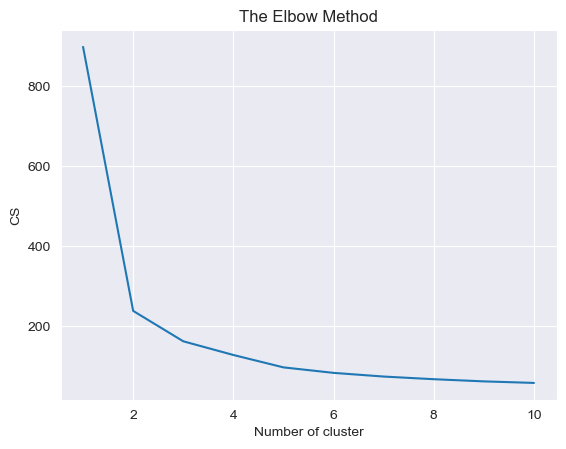

In [40]:
cs= []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300,n_init=10,random_state=0)
    kmeans.fit(scaled)
    cs.append(kmeans.inertia_)
plt.plot(range(1,11),cs)
plt.title("The Elbow Method")
plt.xlabel("Number of cluster")
plt.ylabel("CS")
plt.show()

We shall now evaluate the choice of number of clusters using true classes related to status type. We shall
then set:

In [41]:
y = customer["status_type"]

Perform k means with 3 clusters. Compare the true labels and predicted ones

In [44]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(scaled)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y==labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [45]:
kmeans.inertia_

161.59633400033613

Perform k means with 4 clusters.

In [46]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(scaled)

# check how many of the samples were correctly labeled
labels = kmeans.labels_

correct_labels = sum(y==labels)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [47]:
kmeans.inertia_

127.31313212987799

Conclusion: